In [1]:
from torch.utils.data import random_split, SubsetRandomSampler, Subset
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import ttest_ind, wilcoxon, mannwhitneyu
import pandas as pd
from tqdm import tqdm
from deepsig import aso, bootstrap_test, permutation_test
from random import sample
import random
CONSIDERED_TESTS = {
    "ASO": lambda a, b: aso(a, b, show_progress=False),
    "Student's t": lambda a, b: ttest_ind(a, b, equal_var=False, alternative="greater")[
        1
    ],
    "Bootstrap": lambda a, b: bootstrap_test(a, b),
    "Permutation": lambda a, b: permutation_test(a, b),
    "Wilcoxon": lambda a, b: wilcoxon(a, b, alternative="greater").pvalue,
    "Mann-Whitney U": lambda a, b: mannwhitneyu(a, b, alternative="greater").pvalue,
}

SAMPLE_SIZES = [5, 10, 15, 20]
MEAN_DIFFS = [0.25, 0.5, 0.75, 1]
SAVE_DIR = "./img"
NUM_SIMULATIONS = {
    "ASO": 500,
    "Student's t": 1000,
    "Bootstrap": 1000,
    "Permutation": 1000,
    "Wilcoxon": 1000,
    "Mann-Whitney U": 1000,
}
P_VALUE_TRESHOLD = 0.05
ASO_THRESHOLD = 0.2
ALL_THRESHOLDS = [0.05, 0.1, 0.2, 0.3, 0.4, 0.5]
DISTRIBUTIONS = {
    "NORMAL": lambda n, mu, sigma, scale: np.random.normal(mu, sigma, n),
    "LAPLACE": lambda n, mu, sigma, scale: np.random.laplace(mu, scale, n),
    "RAYLEIGH": lambda n, mu, sigma, scale: np.random.rayleigh(scale, n)
}

def normal_mixture(
    loc: float,
    scale: float,
    size: int,
    loc2: float = -0.5,
    scale2: float = 0.25,
    mixture_coeff: float = 0.7,
):
    """
    Define a simple sampling procedure from a mixture of two normal distributions.
    """
    samples1 = np.random.normal(
        loc=loc, scale=scale, size=int(size * mixture_coeff)
    )
    samples2 = np.random.normal(
        loc=loc2, scale=scale2, size=size - int(size * mixture_coeff)
    )
    combined_samples = np.concatenate((samples1, samples2))
    return combined_samples

In [3]:
def compute_stats(scores, stats_dict):
    #Takes in sets of scores, performs various statistical testing 
    #Output is 2d array, type of test on one axis and sample size on the other
    for samp_size in SAMPLE_SIZES:
        scores1 = sample(list(scores[0]),samp_size)
        scores2 = sample(list(scores[1]),samp_size)
        samp_size_scores = []
        iter = 0
        for key in CONSIDERED_TESTS:
            pval = CONSIDERED_TESTS[key](scores1, scores2)
            stats_dict[samp_size][iter].append(pval)
            iter += 1
        
    return stats_dict

In [6]:
def get_scores(n, dist, mu = 0, scale = 0, sigma = 0):
    #Takes in models and data, performs 40 bootstrap samples (20 for each model)
    #Returns two lists of scores (list of list)
    scores1 = DISTRIBUTIONS[dist](n, mu, sigma, scale)
    
    scores2 = DISTRIBUTIONS[dist](n, mu=0, sigma=1.5, scale = scale)
    
    scores = [scores1, scores2]
    return scores

In [7]:
def get_scores_mixture(loc, scale, size):
    #Takes in models and data, performs 40 bootstrap samples (20 for each model)
    #Returns two lists of scores (list of list)
    scores1 = normal_mixture(loc, scale, size)
    
    scores2 = normal_mixture(loc, scale, size)
    
    scores = [scores1, scores2]
    return scores

In [8]:
def make_statistics(nloops):
    #full_data_X and full_data_y must be two numpy arrays
    stats_dict = {
    5: [[], [], [], [], [], []],
    10: [[], [], [], [], [], []],
    15: [[], [], [], [], [], []],
    20: [[], [], [], [], [], []]
    }
    for i in range(0, nloops):
        if i % 10 == 0:
            print(i)
        scores = get_scores(n =20, dist = "NORMAL", mu = 0.5, sigma=1.5)
        #scores = get_scores_mixture(loc = 1.5, scale = 1, size = 20)
        stats_dict = compute_stats(scores, stats_dict)
    return(stats_dict)

In [10]:
stats = make_statistics(750)

0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
600
610
620
630
640
650
660
670
680
690
700
710
720
730
740


In [12]:
#save stats to json file
import json
with open('stats_normal_22.json', 'w') as fp:
    json.dump(stats, fp)

    

In [ ]:
#load stats from json file
import json
with open('stats_normal_22.json', 'r') as fp:
    stats = json.load(fp)
    

In [13]:
#for each sample size, calculate the type 1 error rate in stats for each test
type1error_dict = {
    5: [],
    10: [],
    15: [],
    20: []
}

for key in stats.keys():
    for j in range(0, 6):
        count = 0
        for k in range(0, 750):
            if j == 0:
                if stats[key][j][k] > 0.2:
                    count += 1
            else:
                if stats[key][j][k] > 0.05:
                    count += 1
                
            
        type1error_dict[key].append(count/750) 

In [70]:
stats

{5: [[1.0,
   1.0,
   1.0,
   0.7049720620719732,
   1.0,
   1.0,
   0.6982911562184989,
   1.0,
   1.0,
   1.0,
   1.0,
   0.47169631088781255,
   0.5461268262110391,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   0.7791083256515038,
   1.0,
   1.0,
   1.0,
   1.0,
   0.6217229084149223,
   1.0,
   0.5540017587787055,
   1.0,
   0.6597165195826109,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   0.997789898320441,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   0.8107081314889844,
   1.0,
   0.826340529192054,
   1.0,
   0.8137662014788627,
   1.0,
   1.0,
   1.0,
   1.0,
   0.8361357977745829,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   0.7232657660599208,
   1.0,
   1.0,
   1.0,
   1.0,
   0.702237906527838,
   1.0,
   1.0,
   1.0,
   1.0,
   0.6569307553826228,
   0.9426748712152957,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   0.4080367507866276,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   1.0,
   0.9936590553922008,
   1.0,
  

In [14]:
#restructure data for line plotting
type1error_dict = pd.DataFrame(type1error_dict)
type1error_dict = type1error_dict.transpose()
type1error_dict.columns = ["ASO", "Student's t", "Bootstrap", "Permutation", "Wilcoxon", "Mann-Whitney U"]
type1error_dict = type1error_dict.reset_index()
type1error_dict = type1error_dict.rename(columns = {"index": "Sample Size"})
type1error_dict = type1error_dict.melt(id_vars = ["Sample Size"], var_name = "Test", value_name = "Type 2 Error Rate")



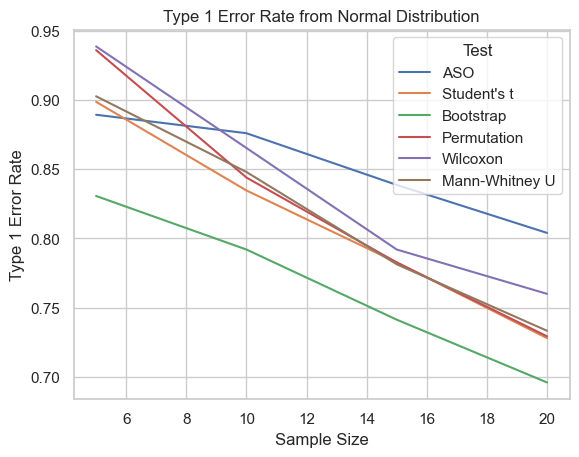

In [15]:
#plot type 1 error rate
import seaborn as sns
sns.set_theme(style="whitegrid")
ax = sns.lineplot(x="Sample Size", y="Type 2 Error Rate", hue="Test", data=type1error_dict)
ax.set_title("Type 1 Error Rate from Normal Distribution")
ax.set(xlabel='Sample Size', ylabel='Type 1 Error Rate')
plt.savefig("type1error_mixture.png")

